In [17]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [22]:
IMG_HEIGHT = 256
IMG_WIDTH  = 256

NUM_AUGMENTED_IMAGE = 50
CSV_FILENAME = '/content/drive/MyDrive/BISINDO/Datasets/bisindo-features.csv'

In [24]:
import os
os.makedirs("data", exist_ok=True)


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split

def split_data(csv_filename):
    df = pd.read_csv(csv_filename)
    train, temp = train_test_split(df, test_size=0.3, stratify=df['label'])
    val, test = train_test_split(temp, test_size=0.5, stratify=temp['label'])

    train.to_csv("data/train.csv", index=False)
    val.to_csv("data/val.csv", index=False)
    test.to_csv("data/test.csv", index=False)

split_data(CSV_FILENAME)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

# Load datasets
train_df = pd.read_csv('data/train.csv')
val_df   = pd.read_csv('data/val.csv')
test_df  = pd.read_csv('data/test.csv')

train = train_df.fillna(0)
val = val_df.fillna(0)
test = test_df.fillna(0)

train

,label,hand_0_x,hand_1_x,hand_2_x,hand_3_x,hand_4_x,hand_5_x,hand_6_x,hand_7_x,hand_8_x,...,hand_32_z,hand_33_z,hand_34_z,hand_35_z,hand_36_z,hand_37_z,hand_38_z,hand_39_z,hand_40_z,hand_41_z
0,X,0.892380,0.720550,6.569385e-07,0.808338,0.636698,-0.022367,0.671622,0.599716,-0.086808,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,S,0.878808,0.454930,-8.446318e-07,0.773240,0.488595,-0.018793,0.635109,0.496608,-0.056277,...,-0.257020,0.372204,1.001006,-0.295294,0.345195,1.021091,-0.248345,0.278728,0.990152,-0.206735
2,N,0.781620,0.652938,1.076674e-06,0.624168,0.677143,-0.035253,0.486649,0.653995,-0.063633,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,K,0.580962,0.716756,-7.669058e-07,0.492845,0.694826,-0.027033,0.426126,0.658886,-0.060373,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,A,0.221112,0.747190,9.558953e-08,0.298267,0.739619,-0.028360,0.377965,0.704097,-0.046279,...,-0.070347,0.743194,0.548751,-0.088370,0.751119,0.590289,-0.070237,0.770347,0.590501,-0.054660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10127,E,0.365450,0.649379,7.700782e-07,0.401400,0.575098,0.000982,0.471462,0.534871,-0.013278,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10128,O,0.883021,0.697676,-2.746664e-07,0.731187,0.744524,-0.002793,0.590379,0.755154,-0.020561,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10129,L,0.464024,0.814961,4.536183e-07,0.538353,0.744968,-0.086218,0.606790,0.667253,-0.132855,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10130,F,0.863374,0.247029,1.572386e-06,0.702702,0.167666,-0.021885,0.560686,0.195320,-0.040015,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [28]:
# Prepare data
X_train = train.drop(columns=['label'])
y_train = train['label']
X_val = val.drop(columns=['label'])
y_val = val['label']
X_test = test.drop(columns=['label'])
y_test = test['label']

# Train RandomForest
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

RandomForestClassifier()

Validation Set Metrics:
Validation Accuracy: 0.9949
Validation F1 Score (Weighted): 0.9949

Validation Classification Report:
              precision    recall  f1-score   support

           A       0.99      0.99      0.99        88
           B       1.00      1.00      1.00        80
           C       1.00      1.00      1.00        90
           D       1.00      0.96      0.98        82
           E       1.00      1.00      1.00        90
           F       1.00      1.00      1.00        89
           G       1.00      1.00      1.00        89
           H       1.00      0.99      0.99        81
           I       1.00      1.00      1.00        90
           J       1.00      1.00      1.00        90
           K       1.00      1.00      1.00        90
           L       0.98      0.99      0.98        88
           M       1.00      1.00      1.00        90
           N       0.99      1.00      0.99        90
           O       0.99      1.00      0.99        90
         

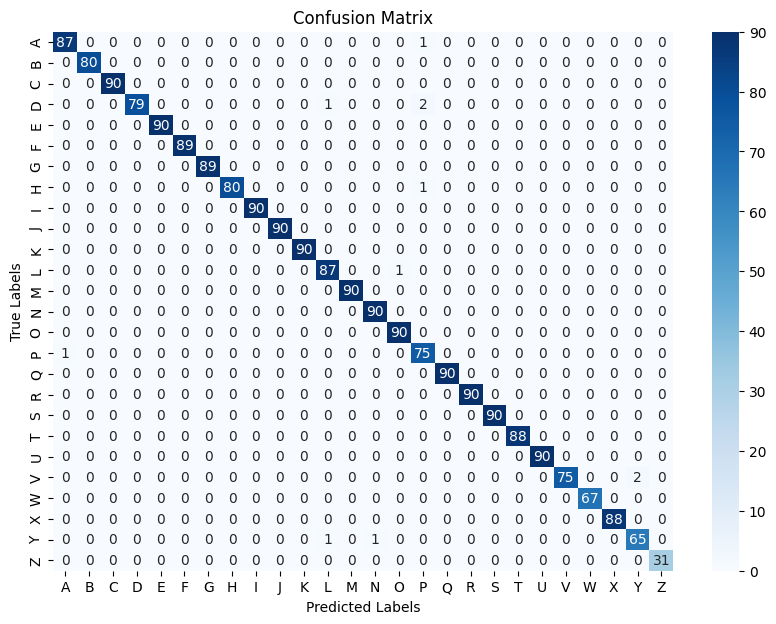

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

y_val_pred = clf.predict(X_val)

val_accuracy = accuracy_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred, average='weighted')
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
val_classification_rep = classification_report(y_val, y_val_pred)

# Print the validation metrics
print("Validation Set Metrics:")
print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Validation F1 Score (Weighted): {val_f1:.4f}')
print("\nValidation Classification Report:")
print(val_classification_rep)

print("Validation Confusion Matrix:")

plt.figure(figsize=(10,7))
sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Test Set Metrics:
Test Accuracy: 0.9959
Test F1 Score (Weighted): 0.9959
Test Confusion Matrix:

Test Classification Report:
              precision    recall  f1-score   support

           A       0.98      1.00      0.99        87
           B       1.00      1.00      1.00        80
           C       1.00      1.00      1.00        90
           D       0.99      1.00      0.99        82
           E       1.00      1.00      1.00        90
           F       1.00      0.99      0.99        90
           G       1.00      0.99      0.99        89
           H       1.00      0.99      0.99        81
           I       1.00      1.00      1.00        90
           J       0.99      1.00      0.99        90
           K       1.00      1.00      1.00        90
           L       1.00      1.00      1.00        89
           M       1.00      1.00      1.00        90
           N       1.00      1.00      1.00        90
           O       1.00      1.00      1.00        90
         

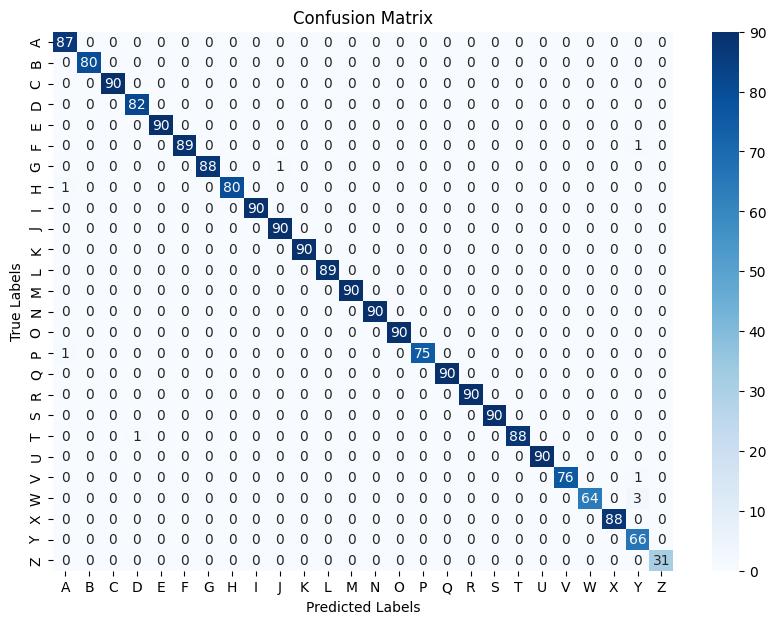

In [30]:
y_test_pred = clf.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_classification_rep = classification_report(y_test, y_test_pred)

print("\nTest Set Metrics:")
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test F1 Score (Weighted): {test_f1:.4f}')
print("Test Confusion Matrix:")

print("\nTest Classification Report:")
print(test_classification_rep)

print("Test Confusion Matrrix")


plt.figure(figsize=(10,7))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [31]:
# Save model
import joblib

joblib.dump(clf, 'bisindo_classifier.pkl')

['bisindo_classifier.pkl']